Your partner's name (if you submit separately):

Enrollment Status (109A, 121A, 209A, or E109A):

Import libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.api import OLS
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.utils import resample
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
%matplotlib inline



C:\Users\charl\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## Cancer Classification from Gene Expressions

In this homework assignment, we will build a classification model to distinguish between two related classes of cancer, acute lymphoblastic leukemia (ALL) and acute myeloid leukemia (AML), using gene expression measurements. The data set is provided in the file `dataset_hw5.csv`. Each row in this file corresponds to a tumor tissue sample from a patient with one of the two forms of Leukemia. The first column contains the cancer type, with 0 indicating the ALL class and 1 indicating the AML class. Columns 2-7130 contain expression levels of 7129 genes recorded from each tissue sample. 

In the following parts, we will use logistic regression to build a classification model for this data set. We will also use principal components analysis (PCA) to visualize the data and to reduce its dimensions. 



## Part (a): Data Exploration

1. First step is to  split  the observations into an approximate 50-50 train-test split.  Below is some code to do this for you (we want to make sure everyone has the same splits).

2. Take a peak at your training set: you should notice the severe differences in the measurements from one gene to the next (some are negative, some hover around zero, and some are well into the thousands).  To account for these differences in scale and variability, normalize each predictor to vary between 0 and 1.

3. Notice that the results training set contains more predictors than observations. Do you foresee a problem in fitting a classification model to such a data set?

4. A convenient tool to visualize the gene expression data is a heat map. Arrange the rows of the training set so that the 'AML' rows are grouped together and the 'ALL' rows are together. Generate a heat map of the data with expression values from the following genes: 
`D49818_at`, `M23161_at`, `hum_alu_at`, `AFFX-PheX-5_at`, `M15990_at`. By observing the heat map, comment on which of these genes are useful in discriminating between the two classes.

5. We can also visualize this data set in two dimensions using PCA. Find the top two principal components for the gene expression data. Generate a scatter plot using these principal components, highlighting the AML and ALL points in different colors. How well do the top two principal components discriminate between the two classes?



In [2]:
np.random.seed(9001)
df = pd.read_csv('dataset_hw5.csv')
msk = np.random.rand(len(df)) < 0.5
data_train = df[msk]
data_test = df[~msk]
#data_train

In [3]:
# Normalizing training set
# numpy array
x = data_train.values
# min_max_scaler is function within sklearn preprocessing
scal = preprocessing.MinMaxScaler()
x_scal = scal.fit_transform(x)
df_train = pd.DataFrame(x_scal)
# setting column names of normalized dataframe
df_train.columns = data_train.columns
df_train = df_train.sort_values(by="Cancer_type")

C:\Users\charl\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, _DataConversionWarning)


In [4]:
# Normalizing testing set
# numpy array
x = data_test.values
# min_max_scaler is function within sklearn preprocessing
scal = preprocessing.MinMaxScaler()
x_scal = scal.fit_transform(x)
df_test = pd.DataFrame(x_scal)
# setting column names of normalized dataframe
df_test.columns = data_test.columns
df_test = df_test.sort_values(by="Cancer_type")

C:\Users\charl\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, _DataConversionWarning)


Notice that the results training set contains more predictors than observations. Do you foresee a problem in fitting a classification model to such a data set? 
<br>
By trying to fit a classification model in a data set that has more predictors than observations, we may run the risk of overfitting on the training set, which would thus produce a model that would likely badly fit the testing set.


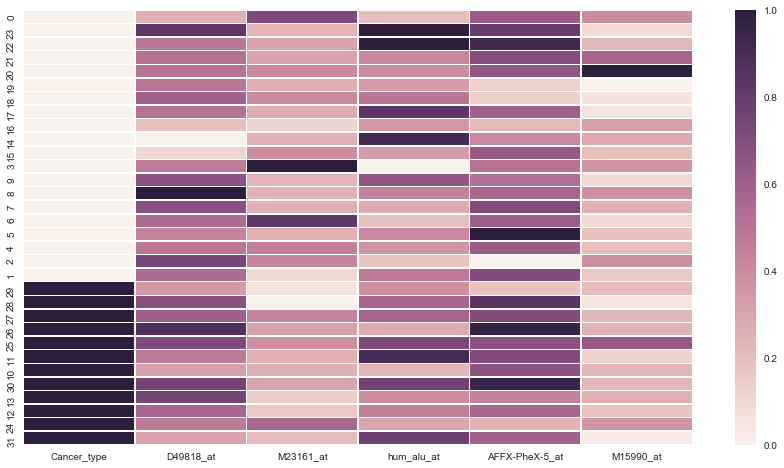

In [5]:
x_cols = df_train[["Cancer_type", "D49818_at", "M23161_at", "hum_alu_at", "AFFX-PheX-5_at", "M15990_at"]]
fig, ax = plt.subplots(1, 1, figsize=(15,8))
ax = sns.heatmap(x_cols, linewidths=.5)
plt.show()

By observing the heat map, comment on which of these genes are useful in discriminating between the two classes.
<br>
Discriminating between the two classes would mean that the column of each headmap, which constitutes the values of different categories, would show highly a distinction between the top part, meaning those that have cancer type 0 and the bottom, which are those that have cancer type 1. It seems as though M23161_at and M15990_at seem to distinguish well between 1 and 0. They both seem to have lighter colors at the bottom while darker at the top. 

In [44]:
x_train1 = df_train.loc[:, df.columns != 'Cancer_type']
y_train1 = df_train['Cancer_type']
x_test1 = df_test.loc[:, df.columns != 'Cancer_type']
y_test1 = df_test['Cancer_type']
x_train2 = df_train.loc[:, df.columns != 'Cancer_type']
y_train2= df_train['Cancer_type']
x_test2 = df_test.loc[:, df.columns != 'Cancer_type']
y_test2 = df_test['Cancer_type']

In [7]:
# PCA to find top 2 principal components for the gene expression data
pca = PCA(n_components=2)
pca.fit(x_train1)
print (pca.explained_variance_ratio_)
pcas = pca.transform(x_train1)
#pcas

[ 0.17206147  0.10732536]


In [8]:
print(pca.explained_variance_ratio_.sum())

0.279386834262


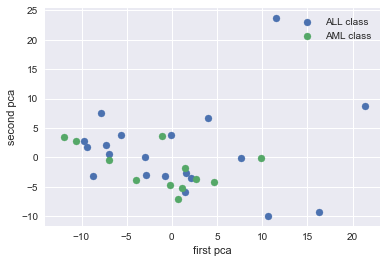

In [9]:
# scatter plot
label = [0,1]
# plt.scatter(pcas[:,0], pcas[:,1], c=y_train1, label=label)
plt.scatter(pcas[y_train1==0,0], pcas[y_train1==0, 1], label='ALL class')
plt.scatter(pcas[y_train1==1,0], pcas[y_train1==1, 1], label='AML class')
plt.xlabel("first pca")
plt.ylabel("second pca");
plt.legend();

How well do the top two principal components discriminate between the two classes? 
<br>
The top two principal components do not well discriminate between the two classes. Based on the graph above, it is not clear what boundary would be used to separate the blue and the green dots from each other. We could use a line with negative slope and intercept at 10, but it would still not ideally distinguish well between the cancer types. Because of this, the top two principal components do not discriminate well between the two classes.

## Part (b): Linear Regression vs. Logistic Regression

Begin by analyzing the differences between using linear regression and logistic regression for classification. For this part, you shall work with a single gene predictor: `M23161_at`.

1. Fit a simple linear regression model to the training set using the single gene predictor `D29963_at`. We could interpret the scores predicted by regression model interpreted for a patient as an estimate of the probability that the patient has the `ALL` type cancer (class 1). Is there a problem with this interpretation?

2. The fitted linear regression model can be converted to a classification model (i.e. a model that predicts one of two binary labels 0 or 1) by classifying patients with predicted score greater than 0.5 into the `ALL` type (class 1), and the others into the `AML` type (class 0). Evaluate the classification accuracy (1 - misclassification rate) of the obtained classification model on both the training and test sets.

3. Next, fit a simple logistic regression model to the training set. How does the training and test calssification accuracy of this model compare with the linear regression model?  Remember, you need to set the regularization parameter for sklearn's logistic regression function to be a very large value in order not to regularize (use 'C=100000').

4. Plot the quantitative output from linear regression model and the probabilistic output from the logistic regression model (on the training set points) as a function of the gene predictor. Also, display the true binary response for the training set points in the same plot.
Based on these plots, does one of the models appear better suited for binary classification than the other? Explain.



R^2: 0.329972737867


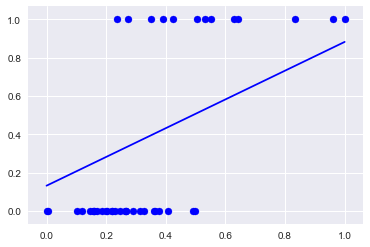

In [12]:
#fitting linear regression using D29963_at
df_train1 = df_train.sort_values(by="D29963_at")
df_test1 = df_test.sort_values(by="D29963_at")
D2_x_train = df_train1["D29963_at"].values
y_train = df_train1["Cancer_type"].values
D2_x_test = df_test1["D29963_at"].values
y_test = df_test1["Cancer_type"].values
D2_x_train.shape
linear = LinearRegression()
linear.fit(D2_x_train.reshape(-1,1), y_train)
score = linear.score(D2_x_test.reshape(-1,1), y_test)
plt.scatter(D2_x_test.reshape(-1,1), y_test, color="blue")
plt.plot(D2_x_test.reshape(-1,1), linear.predict(D2_x_test.reshape(-1,1)), color="blue")
print("R^2:", score)

We could interpret the scores predicted by regression model interpreted for a patient as an estimate of the probability that the patient has the ALL type cancer (class 1). Is there a problem with this interpretation?
- Linear regression can give us values less than 0 and greater than 1, which don't make sense if you're trying to interpret those values as probabilities. The linear regression can give us a general sense for the relationship between dependent variable and predictor, but it doesn't make sense to interpret the predicted values as the probability that the patient has ALL type cancer, because a linear regression assumes that the dependent variable is continuous.

In [13]:
#converting linear regression to a classification model
# if predicted score is greater than 0.5, then 1 else 0
train_predict = linear.predict(D2_x_train.reshape(-1, 1))
test_predict = linear.predict(D2_x_test.reshape(-1, 1))
# Making the predictions / classification of outcome
train_classified = [1 if x > 0.5 else 0 for x in train_predict]
test_classified = [1 if x > 0.5 else 0 for x in test_predict]
# Accuracy score is the % of correct predictions made out of all pred made
train_score = accuracy_score(y_train, train_classified)
test_score = accuracy_score(y_test, test_classified)
print("Accuracy score training: ", train_score)
print("Accuracy score testing: ", test_score)

Accuracy score training:  0.71875
Accuracy score testing:  0.853658536585


In [45]:
#logistic regression
log = LogisticRegression(C=100000)
log.fit(D2_x_train.reshape(-1, 1), y_train)
# score is function within Logistic regression 
# returns mean accuracy on given test data
train_score = log.score(D2_x_train.reshape(-1, 1), y_train)
test_score = log.score(D2_x_test.reshape(-1, 1), y_test)
print("Training score: ", train_score)
print("Testing score: ", test_score)

Training score:  0.71875
Testing score:  0.829268292683


 How does the training and test classification accuracy of this model compare with the linear regression model? 
 - The training and test classification accuracy of the logistic model are very similar to the training and test classification accuracy of the linear regression. The accuracy scores for the training sets are exactly the same and the test score for the logictic model is actually lower than that of the linear regression model. We don't know why the training scores of both models are the same nor how the test score is higher than the training score for both models, but we assume that there is some peculiarity in our test/train split that accounts for this.

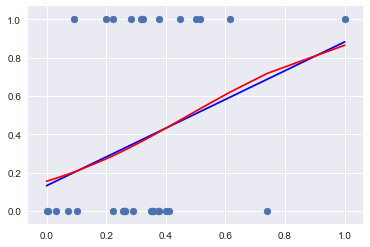

In [15]:
#plotting stuff
#I'm not sure why the plot of the probabilities looks so weird, that's the problem I was looking to ask about in OH
plt.scatter(D2_x_train, y_train)
plt.plot(D2_x_train, linear.predict(D2_x_train.reshape(-1, 1)), color="blue")
plt.plot(D2_x_train, log.predict_proba(D2_x_train.reshape(-1, 1))[:,1], color = "red");

Based on these plots, does one of the models appear better suited for binary classification than the other?
- Based on these plots alone it is not clear that either model is better suited for classification, however from lecture we know that the logistic model will offer much greater interpretability of both the coefficient(s) and the predicted values, which are equivalent to the "log-odds" of a patient having cancer type ALL.

## Part (c): Multiple Logistic Regression

1. Next, fit a multiple logistic regression model with all the gene predictors from the data set.  How does the classification accuracy of this model compare with the models fitted in Part (b) with a single gene (on both the training and test sets)?  

2. "Use the `visualize_prob` from `HW5_functions.py` to visualize the probabilties predicted by the fitted multiple logistic regression model on both the training and test data sets. The function creates a visualization that places the data points on a vertical line based on the predicted probabilities, with the `ALL` and `AML` classes shown in different colors, and with the 0.5 threshold highlighted using a dotted horizontal line.  Is there a difference in the spread of probabilities in the training and test plots? Are there data points for which the predicted probability is close to 0.5? If so, what can you say about these points?"

In [38]:
# starter code
from HW5_functions import visualize_prob

In [39]:
x_train1.shape

(32, 7129)

In [46]:
log1 = LogisticRegression(C = 1000000000)
log1.fit(x_train1, y_train1)
score1_train = log1.score(x_train1, y_train1)
score1_test = log1.score(x_test1, y_test1)
print("Score train: ", score1_train)
print("Score test: ", score1_test)

Score train:  1.0
Score test:  0.926829268293


In [41]:
def visualize_prob(model, x, y, ax):
    import numpy as np

    # Use the model to predict probabilities for
    y_pred = model.predict_proba(x)

    # Separate the predictions on the label 1 and label 0 points
    # ypos = y_pred[y==1]
    # yneg = y_pred[y==0]
    ypos = y_pred[np.where(y == 1)]
    yneg = y_pred[np.where(y == 0)]

    # Count the number of label 1 and label 0 points
    npos = ypos.shape[0]
    nneg = yneg.shape[0]

    # Plot the probabilities on a vertical line at x = 0,
    # with the positive points in blue and negative points in red
    pos_handle = ax.plot(np.zeros((npos,1)), ypos[:,1], 'bx', label ='ALL')
    neg_handle = ax.plot(np.zeros((nneg,1)), yneg[:,1], 'rx', label = 'AML')
    pos_handle = ax.plot(np.zeros((npos,1)), ypos[:,1], 'bo', label ='ALL')
    neg_handle = ax.plot(np.zeros((nneg,1)), yneg[:,1], 'ro', label = 'AML')

    # Line to mark prob 0.5
    ax.axhline(y = 0.5, color = 'k', linestyle = '--')

    # Add y-label and legend, do not display x-axis, set y-axis limit
    ax.set_ylabel('Probability of AML class')
    ax.legend(loc = 'best')
    ax.get_xaxis().set_visible(False)
    ax.set_ylim([0,1])

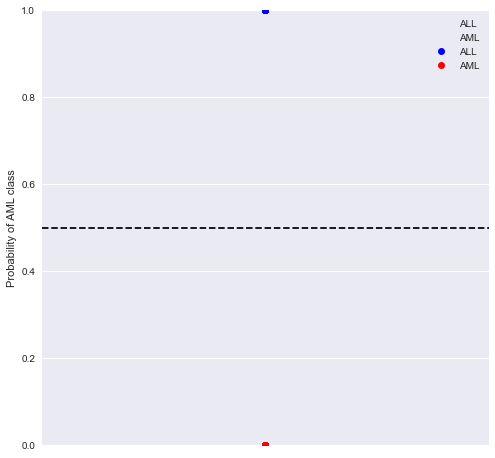

In [42]:
# prob predicted by the fitted multiple logistic regression model on training 
fig, ax = plt.subplots(1, 1, figsize=(8,8))
visualize_prob(log1, x_train1, y_train1, ax)

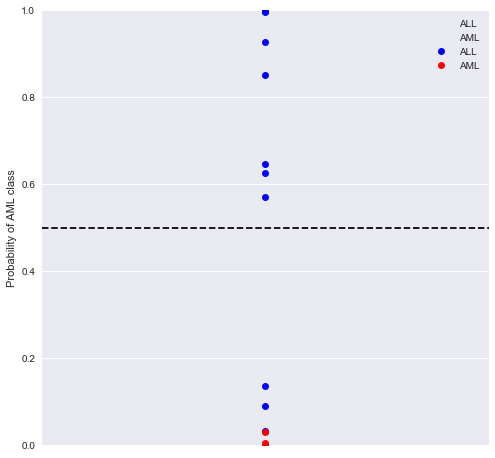

In [43]:
# prob predicted by the fitted multiple logistic regression model on testing 
fig, ax = plt.subplots(1, 1, figsize=(8,8))
visualize_prob(log1, x_test1, y_test1, ax)

How does the classification accuracy of this model compare with the models fitted in part b with a single gene (on both the training and the test sets)? 
The training model above fits data perfectly because it is predicting on the training data, and thus the prediction will match the actual value of the outcome. The testing model instead shows a different outcome which is not very effective. As shown, there are many blue dots whose actual value should be one but the probability of being predicted 1 is very low. The same thing applies for the red dots on the right hand side. But, they are more precise compared to the linear model fitting in part b.  

## Part (d): Analyzing Significance of Coefficients

How many of the coefficients estimated by the multiple logistic regression in the previous problem are significantly different from zero at a *significance level of 95%*? 

Hint: To answer this question, use *bootstrapping* with 100 boostrap samples/iterations.  



- logistic regression and beta coeffs for one sample
- go through this for 99 more through bootstrap
- get these in matrix 7.... * 100
everythig in traning 
- order and take the percentile -- 2.5% and 97.5% np.percentile
- if interval includes zero, then not statistically significant. Otherwise it is

In [23]:
# create matrix
from sklearn.utils import resample
coefs = np.empty((1, 7129))
for i in range(100):
    sample = resample(df_train, n_samples = 32, random_state = i)
    x_train3 = sample.loc[:, df.columns != 'Cancer_type']
    y_train3 = sample['Cancer_type']
    log2 = LogisticRegression(C = 1000000000)
    log2.fit(x_train3, y_train3)
    coefs = np.concatenate((coefs, log2.coef_), axis=0)
#get rid of first row of empty values
coefs = np.delete(coefs, 0, 0)
#shape should be (100, 7129)
coefs.shape
    

(100, 7129)

In [24]:
def zero_between(low, high):
    if (high > 0 and low > 0) or (high < 0 and low < 0):
        return False
    else:
        return True

In [25]:
z = np.percentile(coefs, [2.5, 97.5], axis=0)
indeces_best_coefs = []
for i in range(100):
    if zero_between(z.T[i][0], z.T[i][1]) == False:
        indeces_best_coefs.append(i)
len(indeces_best_coefs)

26

#### 26 Coefficients are significantly different from 0 at a significance level of 95%

## Part (e): Dimensionality Reduction using PCA

A reasonable approach to reduce the dimensionality of the data is to use PCA and fit a logistic regression model on the first set of principal components contributing to 90% of the variance in the predictors.

1. How do the classification accuracy values on both the training and tests sets compare with the models fitted in Parts (c) and (d)?  

2. Re-fit a logistic regression model using 5-fold cross-validation to choose the number of principal components, and comment on whether you get better test performance than the model fitted above (explain your observations). 

3. Use the code provided in Part (c) to visualize the probabilities predicted by the fitted models on both the training and test sets. How does the spread of probabilities in these plots compare to those for the models in Part (c) and (d)? 


How do the classification accuracy values on both the training and tests sets compare with the models fitted in Parts c and d? 
- Our training and test accuracy scores are exactly the same as those we got in part c, but they are much greater than those we found in part b. We don't know why the training and test scores are the same, despite the fact that one model uses PCA and the other doesn't.

In [26]:
#this shows that n_components=24 explains 90% of the variance
pca = PCA(n_components=32)
pca.fit(x_train2)
print(np.cumsum(pca.explained_variance_ratio_))

[ 0.17206147  0.27938683  0.34183388  0.39368451  0.43824274  0.47974624
  0.51963303  0.55521235  0.58789777  0.61901476  0.64762777  0.67307749
  0.69746031  0.72048818  0.74229508  0.76384259  0.78459862  0.80490375
  0.82481842  0.84306721  0.8610799   0.87838093  0.89501506  0.91080966
  0.92591036  0.94054329  0.95461651  0.96742743  0.97935908  0.99034724
  1.          1.        ]


In [35]:
pca = PCA(n_components = 24)
pca.fit(x_train2)
x_train_pca = pca.transform(x_train2)
x_test_pca = pca.transform(x_test2)
log_pca = LogisticRegression(C=100000)
log_pca.fit(x_train_pca, y_train2)
train_score = log_pca.score(x_train_pca, y_train2)
test_score = log_pca.score(x_test_pca, y_test2)
print("Train score: {} \nTest score: {}".format(train_score, test_score))

Train score: 1.0 
Test score: 0.926829268292683


In [28]:
# cross validation loop
n_folds = 5
scores = np.zeros(33)

#for each train/validation split we get the score of all possible n_components
for train, valid in KFold(n_folds, shuffle=False).split(range(32)): # split data into train/test groups, 5 times
    pca = PCA(n_components=32)
    x_train_pca = pca.fit_transform(x_train2.iloc[train])
    x_test_pca = pca.transform(x_train2.iloc[valid])
    for x in range(1, 33):
        nx_train = x_train_pca[:, 0:x]
        ny_train = y_train2.iloc[train]
        nx_valid = x_test_pca[:, 0:x]
        ny_valid = y_train2.iloc[valid]
        log_pca_cv = LogisticRegression(C=100000)
        log_pca_cv.fit(nx_train, ny_train)
        scores[x] = scores[x] + log_pca_cv.score(nx_valid, ny_valid)
scores = [i/5 for i in scores]
for index, j in enumerate(scores):
    print("average score with n_components = {}: {}".format(index, j))

average score with n_components = 0: 0.0
average score with n_components = 1: 0.3333333333333333
average score with n_components = 2: 0.3952380952380953
average score with n_components = 3: 0.4238095238095238
average score with n_components = 4: 0.6380952380952382
average score with n_components = 5: 0.7714285714285716
average score with n_components = 6: 0.7142857142857143
average score with n_components = 7: 0.5857142857142856
average score with n_components = 8: 0.7095238095238096
average score with n_components = 9: 0.7380952380952381
average score with n_components = 10: 0.680952380952381
average score with n_components = 11: 0.7142857142857143
average score with n_components = 12: 0.7428571428571429
average score with n_components = 13: 0.8761904761904763
average score with n_components = 14: 0.8761904761904763
average score with n_components = 15: 0.8428571428571429
average score with n_components = 16: 0.8761904761904763
average score with n_components = 17: 0.8809523809523808


In [30]:
pca = PCA(n_components = 26)
pca.fit(x_train2)
x_train_pca1 = pca.transform(x_train2)
x_test_pca1 = pca.transform(x_test2)
log_pca1 = LogisticRegression(C=100000)
log_pca1.fit(x_train_pca1, y_train2)
log_pca1.score(x_test_pca1, y_test2)

0.95121951219512191

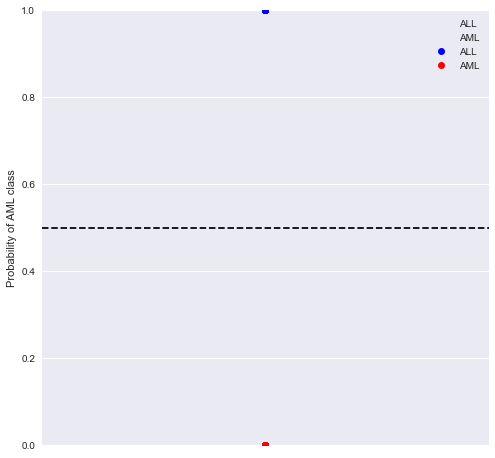

In [31]:
#prob predicted by the fitted model on training for n_components = 26
fig, ax = plt.subplots(1, 1, figsize=(8,8))
visualize_prob(log_pca1, x_train_pca1, y_train2, ax)

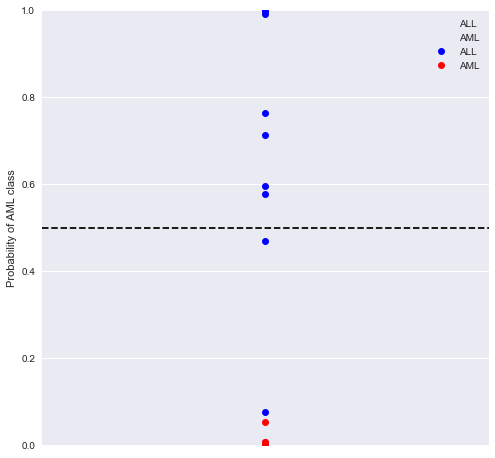

In [32]:
#prob predicted by the fitted model on testing for n_components = 26
fig, ax = plt.subplots(1, 1, figsize=(8,8))
visualize_prob(log_pca1, x_test_pca1, y_test2, ax)

Comment on whether you get better test performance than the model fitted above (explain your observations)
- We do get better test performance than the first model as our score is about 0.024 better when we select the best number of PCA components through cross-validation. Based on the cross-validation results it is clear that increasing the n_components improves the score of the model, but this trend plateaus at n_components = 26, so this is the best number to use, because it gets the best score possible without having to incorporate as many PCA components.

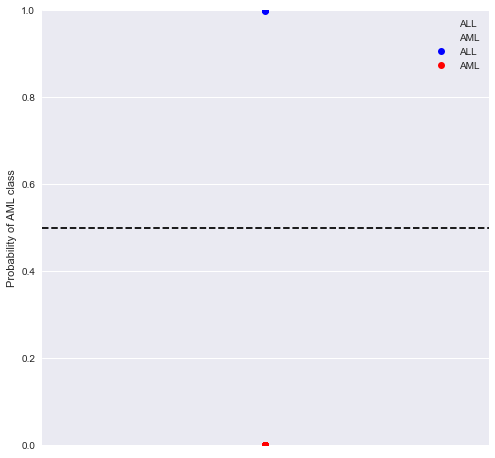

In [36]:
#prob predicted by the fitted model on training for n_components = 24
fig, ax = plt.subplots(1, 1, figsize=(8,8))
visualize_prob(log_pca, x_train_pca, y_train2, ax)

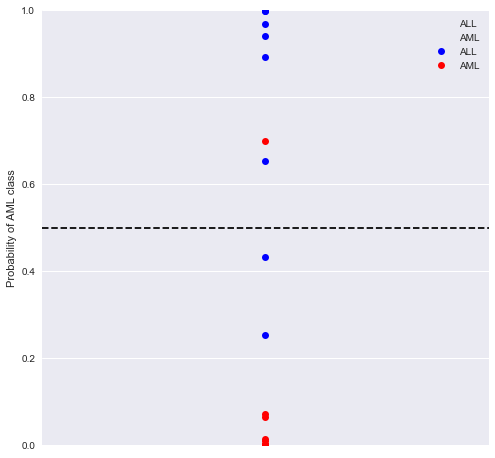

In [37]:
#prob predicted by the fitted model on testing for n_components = 24
fig, ax = plt.subplots(1, 1, figsize=(8,8))
visualize_prob(log_pca, x_test_pca, y_test2, ax)

How does the spread of probabilities in these plots compare to those for the models in Part (c) and (d)?
<br>
The model with n_components = 24 seems to have a worse spread of probabilities, but the model with n_components = 26 has the same spread as the model from part c.

---
 

# APCOMP209a - Homework Question

Suppose we want to conduct PCA on the model matrix $X \in \Re^{n×p}$, where the columns have been suitably set to zero mean. In this question, we consider the squared reconstruction error:

$$  \parallel XQ- XQ_m \parallel ^2 $$

for a suitable set of eigenvectors forming the matrix $Q_m$, as discussed below. Suppose that we conduct eigendecomposition of $X^T X$ and obtain eigenvalues $\lambda_1, \ldots , \lambda_p$ and principal components $Q$, i.e.

$$ X^T X = Q \Lambda Q ^T $$

(1) Suppose that the matrix norm is simply the squared dot product, namely

$$ \parallel A \parallel ^2 = A^T A $$

Then, express the reconstruction error as a sum of matrix products.

(2) Simplify your result from (1) based on properties of the matrices $Q$.

(3) Now let $Q_m$ be the matrix of the first $m < p$ eigenvectors, namely

$$ Q_m = (q_1, \ldots, q_m, 0, \ldots, 0) \in \Re^{p \times p} $$

Thus, $X Q_m$ is the PCA projection of the data into the space spanned by the first $m$ principal components. Express the products $Q^T_m Q$ and $Q^T Q_m$, again using properties of the eigenbasis $q_1, \ldots, q_p$.

(4) Use your results from (3) to finally fully simplify your expression from (2).

(5) Note that the result you obtain should still be a matrix, i.e. this does not define a proper norm on the space of matrices (since the value should be a scalar). Consequently, the true matrix norm is actually the trace of the
above result, namely

$$ \parallel A \parallel ^2  = {\rm trace} (A^T A) $$
Use your result from (4) and this new definition to find a simple expression
for the reconstruction error in terms of the eigenvalues.

(6) Interpret your result from (5). In light of your results, does our procedure for PCA (selecting the $m$ substantially larger eigenvalues) make sense? Why or why not?